In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(20)

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,-50000
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95,-50000
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,-50000
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               199523 non-null  int64 
 1   class_of_worker                   199523 non-null  object
 2   industry_code                     199523 non-null  int64 
 3   occupation_code                   199523 non-null  int64 
 4   education                         199523 non-null  object
 5   wage_per_hour                     199523 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       199523 non-null  object
 7   marital_status                    199523 non-null  object
 8   major_industry_code               199523 non-null  object
 9   major_occupation_code             199523 non-null  object
 10  race                              199523 non-null  object
 11  hispanic_origin                   198649 non-null  object
 12  se

In [5]:
df['income_level'].value_counts()

-50000    187141
 50000     12382
Name: income_level, dtype: int64

In [6]:
df['income_level'] = np.where(df['income_level'] == -50000, 0 , 1)

In [7]:
df['income_level'].value_counts()

0    187141
1     12382
Name: income_level, dtype: int64

C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income_level', ylabel='count'>

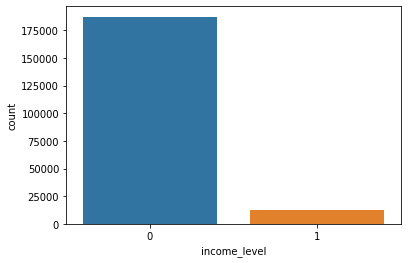

In [8]:
sns.countplot(df['income_level'])

In [9]:
df.index

RangeIndex(start=0, stop=199523, step=1)

In [10]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['income_level']==0)] 
df_minority = df[(df['income_level']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 187141, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [11]:
df_upsampled.index

Int64Index([117254,  14247,  87358,  84187, 193116, 182641,  92858, 101235,
              8075,  71655,
            ...
            199513, 199514, 199515, 199516, 199517, 199518, 199519, 199520,
            199521, 199522],
           dtype='int64', length=374282)

In [198]:
df_upsampled['income_level'].value_counts()

1    187141
0    187141
Name: income_level, dtype: int64

In [12]:
df = df_upsampled

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374282 entries, 117254 to 199522
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               374282 non-null  int64 
 1   class_of_worker                   374282 non-null  object
 2   industry_code                     374282 non-null  int64 
 3   occupation_code                   374282 non-null  int64 
 4   education                         374282 non-null  object
 5   wage_per_hour                     374282 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       374282 non-null  object
 7   marital_status                    374282 non-null  object
 8   major_industry_code               374282 non-null  object
 9   major_occupation_code             374282 non-null  object
 10  race                              374282 non-null  object
 11  hispanic_origin                   372552 non-null  object
 1

In [14]:
df.index

Int64Index([117254,  14247,  87358,  84187, 193116, 182641,  92858, 101235,
              8075,  71655,
            ...
            199513, 199514, 199515, 199516, 199517, 199518, 199519, 199520,
            199521, 199522],
           dtype='int64', length=374282)

In [15]:
df.reset_index(inplace = True)

In [16]:
df.index

RangeIndex(start=0, stop=374282, step=1)

In [17]:
df.isnull().sum()

index                                    0
age                                      0
class_of_worker                          0
industry_code                            0
occupation_code                          0
education                                0
wage_per_hour                            0
enrolled_in_edu_inst_lastwk              0
marital_status                           0
major_industry_code                      0
major_occupation_code                    0
race                                     0
hispanic_origin                       1730
sex                                      0
member_of_labor_union                    0
reason_for_unemployment                  0
full_parttime_employment_stat            0
capital_gains                            0
capital_losses                           0
dividend_from_Stocks                     0
tax_filer_status                         0
region_of_previous_residence             0
state_of_previous_residence           1374
d_household

In [18]:
X = df.drop(['income_level'], axis = 1)
Y = df[['income_level']]

In [19]:
X.index

RangeIndex(start=0, stop=374282, step=1)

In [20]:
Y.index

RangeIndex(start=0, stop=374282, step=1)

In [21]:
num = X.select_dtypes(include = ['number'])
char = X.select_dtypes(include = ['object'])

In [22]:
num.tail(20)

,index,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
374262,199501,13,0,0,0,0,0,0,0,0,0,0,94
374263,199502,50,29,2,0,0,0,0,4,2,2,48,95
374264,199503,24,33,29,0,0,0,0,6,2,2,52,95
374265,199504,43,22,36,0,0,0,0,4,0,2,52,95
374266,199505,33,34,3,0,0,0,0,6,0,2,52,95
374267,199506,14,0,0,0,0,0,0,0,0,0,0,94
374268,199507,25,33,16,0,0,0,0,1,0,2,52,94
374269,199510,25,33,41,0,0,0,0,4,0,2,52,94
374270,199511,47,23,37,0,0,0,0,5,0,2,52,95
374271,199512,71,0,0,0,0,0,0,0,0,2,0,95


C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

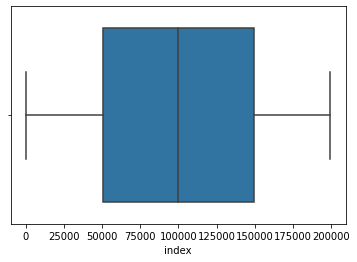

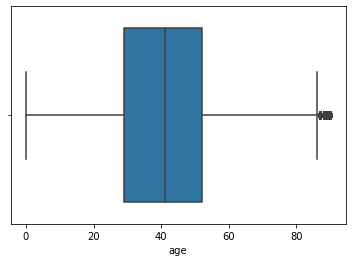

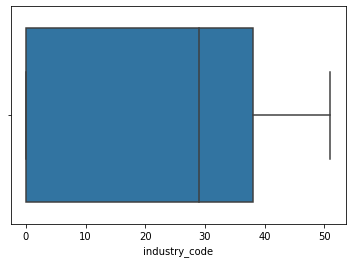

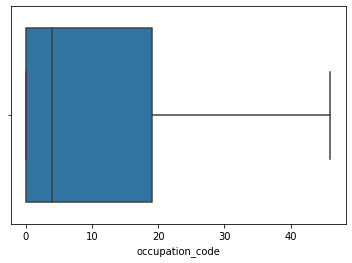

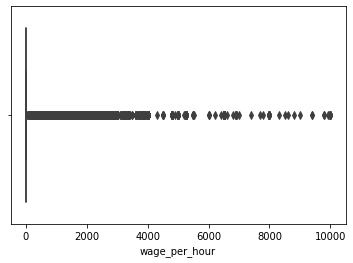

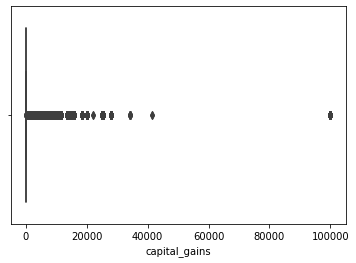

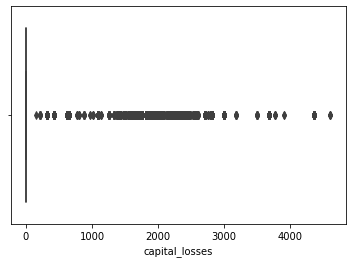

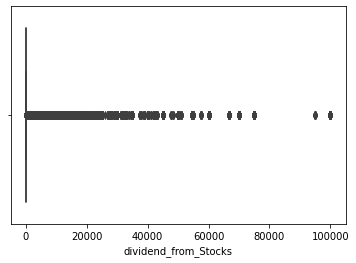

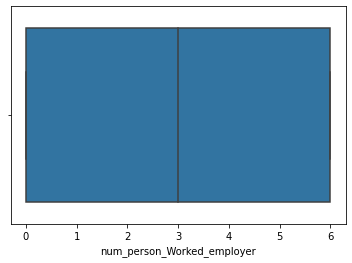

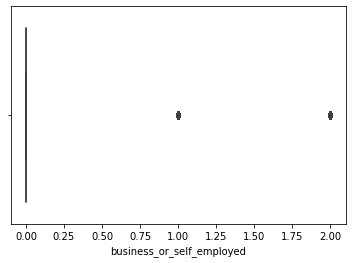

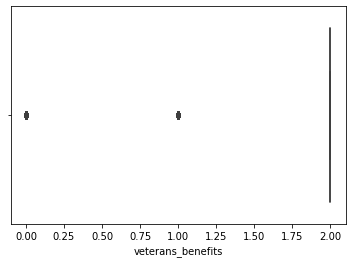

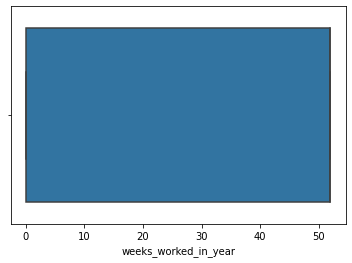

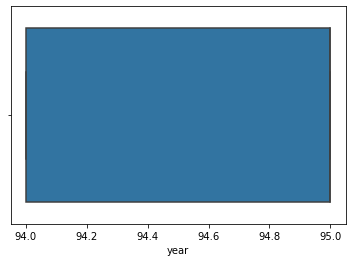

In [23]:
for col in num.columns:
    plt.figure()
    sns.boxplot(num[col])

In [24]:
num.isnull().sum()

index                         0
age                           0
industry_code                 0
occupation_code               0
wage_per_hour                 0
capital_gains                 0
capital_losses                0
dividend_from_Stocks          0
num_person_Worked_employer    0
business_or_self_employed     0
veterans_benefits             0
weeks_worked_in_year          0
year                          0
dtype: int64

In [25]:
for col in num.columns:
    q1 = num[col].quantile(0.25)
    q3 = num[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    num[col] = np.where(num[col]>upper, np.nan, num[col])
    num[col] = np.where(num[col]<lower, np.nan, num[col])

C:\Users\pranj\AppData\Local\Temp/ipykernel_31864/1926996054.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num[col] = np.where(num[col]>upper, np.nan, num[col])
C:\Users\pranj\AppData\Local\Temp/ipykernel_31864/1926996054.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num[col] = np.where(num[col]<lower, np.nan, num[col])


In [26]:
num.isnull().mean()

index                         0.000000
age                           0.005354
industry_code                 0.000000
occupation_code               0.000000
wage_per_hour                 0.051314
capital_gains                 0.110091
capital_losses                0.054860
dividend_from_Stocks          0.246042
num_person_Worked_employer    0.000000
business_or_self_employed     0.122867
veterans_benefits             0.140659
weeks_worked_in_year          0.000000
year                          0.000000
dtype: float64

In [27]:
for col in num.columns:
    num[col].fillna(num[col].median(), inplace = True)

C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [28]:
num.isnull().mean()

index                         0.0
age                           0.0
industry_code                 0.0
occupation_code               0.0
wage_per_hour                 0.0
capital_gains                 0.0
capital_losses                0.0
dividend_from_Stocks          0.0
num_person_Worked_employer    0.0
business_or_self_employed     0.0
veterans_benefits             0.0
weeks_worked_in_year          0.0
year                          0.0
dtype: float64

In [29]:
for col in num.columns:
    q1 = num[col].quantile(0.25)
    q3 = num[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    num[col] = np.where(num[col]>upper, upper, num[col])
    num[col] = np.where(num[col]<lower, lower, num[col])

C:\Users\pranj\AppData\Local\Temp/ipykernel_31864/621953406.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num[col] = np.where(num[col]>upper, upper, num[col])
C:\Users\pranj\AppData\Local\Temp/ipykernel_31864/621953406.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num[col] = np.where(num[col]<lower, lower, num[col])


C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

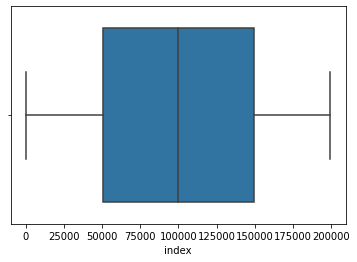

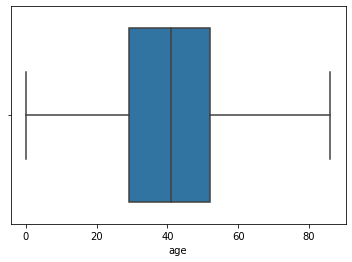

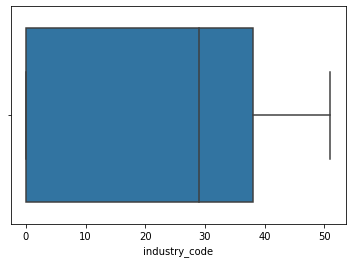

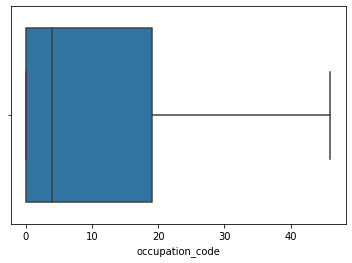

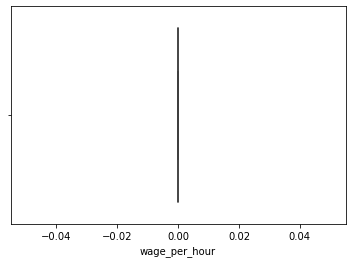

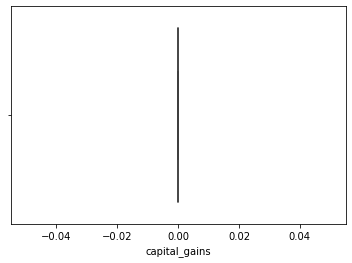

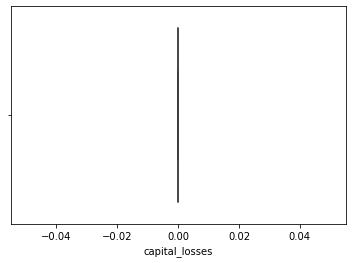

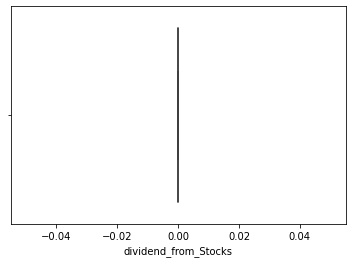

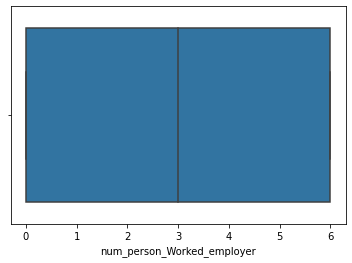

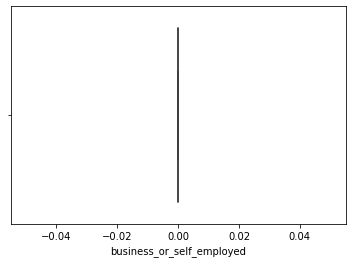

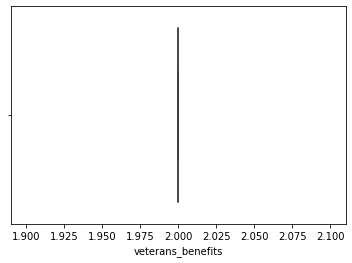

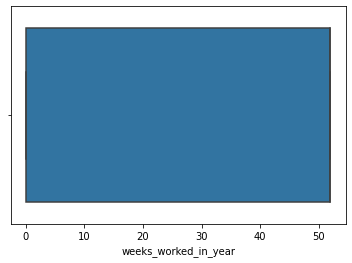

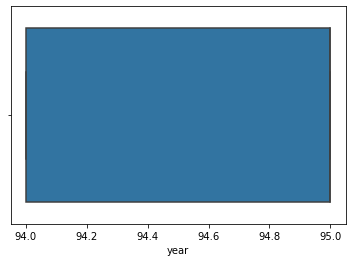

In [30]:
for col in num.columns:
    plt.figure()
    sns.boxplot(num[col])

In [31]:
num.drop(['wage_per_hour','capital_gains','capital_losses','dividend_from_Stocks','business_or_self_employed',
         'veterans_benefits'], axis = 1, inplace = True)

C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
num.columns

Index(['index', 'age', 'industry_code', 'occupation_code',
       'num_person_Worked_employer', 'weeks_worked_in_year', 'year'],
      dtype='object')

In [33]:
num.head(25)

,index,age,industry_code,occupation_code,num_person_Worked_employer,weeks_worked_in_year,year
0,117254.0,34.0,41.0,8.0,6.0,52.0,94.0
1,14247.0,55.0,13.0,2.0,3.0,52.0,94.0
2,87358.0,55.0,45.0,12.0,1.0,48.0,94.0
3,84187.0,34.0,11.0,11.0,6.0,52.0,94.0
4,193116.0,43.0,30.0,2.0,6.0,52.0,95.0
5,182641.0,51.0,43.0,12.0,6.0,40.0,94.0
6,92858.0,39.0,30.0,11.0,6.0,52.0,94.0
7,101235.0,47.0,32.0,18.0,6.0,52.0,94.0
8,8075.0,35.0,12.0,18.0,3.0,52.0,95.0
9,71655.0,48.0,33.0,3.0,2.0,52.0,94.0


In [34]:
char.head()

,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,...,migration_reg,migration_within_reg,live_1_year_ago,migration_sunbelt,family_members_under_18,country_father,country_mother,country_self,citizenship,fill_questionnaire_veteran_admin
0,Private,High school graduate,Not in universe,Never married,Hospital services,Professional specialty,White,All other,Female,Not in universe,...,Nonmover,Nonmover,Yes,Not in universe,Not in universe,Ireland,Ireland,Ireland,Foreign born- Not a citizen of U S,Not in universe
1,Private,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,Not in universe,...,Nonmover,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
2,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Other professional services,Professional specialty,White,All other,Male,Not in universe,...,Nonmover,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
3,Private,Prof school degree (MD DDS DVM LLB JD),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,Female,Not in universe,...,Nonmover,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
4,Private,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Communications,Executive admin and managerial,White,All other,Female,Not in universe,...,NaN,NaN,Not in universe under 1 year old,NaN,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe


In [35]:
char['class_of_worker'].value_counts()

Private                           175109
Not in universe                   112922
Self-employed-not incorporated     23817
Local government                   19783
Self-employed-incorporated         19458
Federal government                 11404
State government                   11155
Never worked                         462
Without pay                          172
Name: class_of_worker, dtype: int64

In [36]:
char.isnull().mean()

class_of_worker                     0.000000
education                           0.000000
enrolled_in_edu_inst_lastwk         0.000000
marital_status                      0.000000
major_industry_code                 0.000000
major_occupation_code               0.000000
race                                0.000000
hispanic_origin                     0.004622
sex                                 0.000000
member_of_labor_union               0.000000
reason_for_unemployment             0.000000
full_parttime_employment_stat       0.000000
tax_filer_status                    0.000000
region_of_previous_residence        0.000000
state_of_previous_residence         0.003671
d_household_family_stat             0.000000
d_household_summary                 0.000000
migration_msa                       0.513052
migration_reg                       0.513052
migration_within_reg                0.513052
live_1_year_ago                     0.000000
migration_sunbelt                   0.513052
family_mem

In [37]:
char.drop(['migration_msa','migration_reg','migration_within_reg','migration_sunbelt'], axis = 1, inplace = True)

C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
char.columns

Index(['class_of_worker', 'education', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'live_1_year_ago', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'fill_questionnaire_veteran_admin'],
      dtype='object')

In [39]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, strategy='quantile',encode = 'ordinal')
num_binned = pd.DataFrame(kbins.fit_transform(num), columns = num.columns)

C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_discretization.py:209: FutureWarning: In version 1.3 onwards, subsample=2e5 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose wi

In [40]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374282 entries, 0 to 374281
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index                       374282 non-null  float64
 1   age                         374282 non-null  float64
 2   industry_code               374282 non-null  float64
 3   occupation_code             374282 non-null  float64
 4   num_person_Worked_employer  374282 non-null  float64
 5   weeks_worked_in_year        374282 non-null  float64
 6   year                        374282 non-null  float64
dtypes: float64(7)
memory usage: 20.0 MB


In [41]:
num_binned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374282 entries, 0 to 374281
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index                       374282 non-null  float64
 1   age                         374282 non-null  float64
 2   industry_code               374282 non-null  float64
 3   occupation_code             374282 non-null  float64
 4   num_person_Worked_employer  374282 non-null  float64
 5   weeks_worked_in_year        374282 non-null  float64
 6   year                        374282 non-null  float64
dtypes: float64(7)
memory usage: 20.0 MB


In [42]:
num_binned.index

RangeIndex(start=0, stop=374282, step=1)

In [43]:
Y.reset_index(inplace = True)

In [44]:
num_binned_Y = pd.concat([num_binned,Y], axis = 1)

In [46]:
Y.index

RangeIndex(start=0, stop=374282, step=1)

In [47]:
num_binned_Y.index

RangeIndex(start=0, stop=374282, step=1)

In [53]:
num_binned.columns

Index(['index', 'age', 'industry_code', 'occupation_code',
       'num_person_Worked_employer', 'weeks_worked_in_year', 'year'],
      dtype='object')

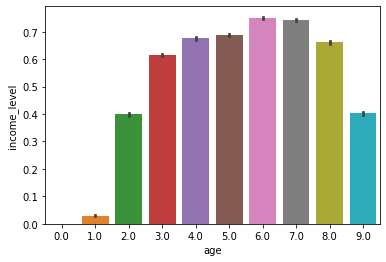

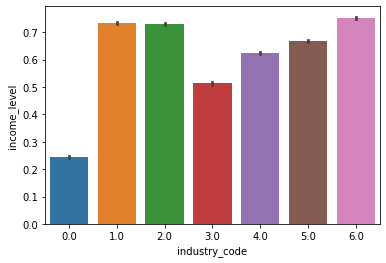

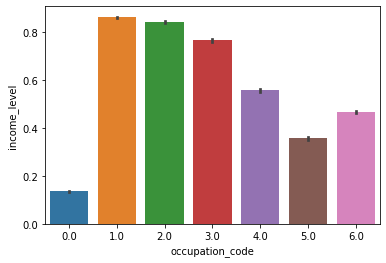

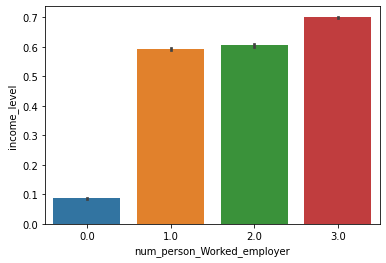

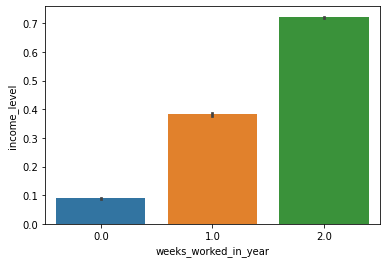

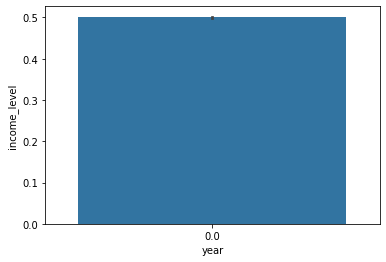

In [55]:
for col in ['age', 'industry_code', 'occupation_code',
       'num_person_Worked_employer', 'weeks_worked_in_year', 'year']:
    plt.figure()
#     sns.lineplot(x = col, y = Y['income_level'].mean(), data = num_binned_Y)
    sns.barplot(x = col, y = 'income_level', data = num_binned_Y)
# sns.barplot(x = 'age', y = 'income_level', data = num_binned_Y)

In [56]:
char.head()

,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,...,state_of_previous_residence,d_household_family_stat,d_household_summary,live_1_year_ago,family_members_under_18,country_father,country_mother,country_self,citizenship,fill_questionnaire_veteran_admin
0,Private,High school graduate,Not in universe,Never married,Hospital services,Professional specialty,White,All other,Female,Not in universe,...,Not in universe,Nonfamily householder,Householder,Yes,Not in universe,Ireland,Ireland,Ireland,Foreign born- Not a citizen of U S,Not in universe
1,Private,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,Not in universe,...,Not in universe,Householder,Householder,Yes,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
2,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Other professional services,Professional specialty,White,All other,Male,Not in universe,...,Not in universe,Spouse of householder,Spouse of householder,Yes,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
3,Private,Prof school degree (MD DDS DVM LLB JD),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,Female,Not in universe,...,Not in universe,Spouse of householder,Spouse of householder,Yes,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
4,Private,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Communications,Executive admin and managerial,White,All other,Female,Not in universe,...,Not in universe,Spouse of householder,Spouse of householder,Not in universe under 1 year old,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe


In [57]:
char.index

RangeIndex(start=0, stop=374282, step=1)

In [58]:
char.reset_index(inplace = True)
Y.reset_index(inplace = True)

In [59]:
char.index

RangeIndex(start=0, stop=374282, step=1)

In [60]:
Y.index

RangeIndex(start=0, stop=374282, step=1)

In [61]:
char_Y = pd.concat([char,Y], axis = 1)

In [63]:
char.isnull().mean()

index                               0.000000
class_of_worker                     0.000000
education                           0.000000
enrolled_in_edu_inst_lastwk         0.000000
marital_status                      0.000000
major_industry_code                 0.000000
major_occupation_code               0.000000
race                                0.000000
hispanic_origin                     0.004622
sex                                 0.000000
member_of_labor_union               0.000000
reason_for_unemployment             0.000000
full_parttime_employment_stat       0.000000
tax_filer_status                    0.000000
region_of_previous_residence        0.000000
state_of_previous_residence         0.003671
d_household_family_stat             0.000000
d_household_summary                 0.000000
live_1_year_ago                     0.000000
family_members_under_18             0.000000
country_father                      0.038613
country_mother                      0.034284
country_se

In [64]:
char.drop(['index'], axis = 1, inplace = True)

C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
for col in char.columns:
    char[col].fillna(char[col].mode()[0], inplace = True)

C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [66]:
Y.isnull().sum()

level_0         0
index           0
income_level    0
dtype: int64

In [67]:
char.isnull().sum()

class_of_worker                     0
education                           0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
hispanic_origin                     0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
tax_filer_status                    0
region_of_previous_residence        0
state_of_previous_residence         0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
family_members_under_18             0
country_father                      0
country_mother                      0
country_self                        0
citizenship                         0
fill_questionnaire_veteran_admin    0
dtype: int64

In [68]:
char.isnull().sum()

class_of_worker                     0
education                           0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
hispanic_origin                     0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
tax_filer_status                    0
region_of_previous_residence        0
state_of_previous_residence         0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
family_members_under_18             0
country_father                      0
country_mother                      0
country_self                        0
citizenship                         0
fill_questionnaire_veteran_admin    0
dtype: int64

In [69]:
char.index

RangeIndex(start=0, stop=374282, step=1)

In [70]:
Y.index

RangeIndex(start=0, stop=374282, step=1)

In [71]:
char_Y = pd.concat([char,Y], axis = 1)

In [72]:
char_Y.isnull().sum()

class_of_worker                     0
education                           0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
hispanic_origin                     0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
tax_filer_status                    0
region_of_previous_residence        0
state_of_previous_residence         0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
family_members_under_18             0
country_father                      0
country_mother                      0
country_self                        0
citizenship                         0
fill_questionnaire_veteran_admin    0
level_0                             0
index                               0
income_level

In [73]:
char_Y.index

RangeIndex(start=0, stop=374282, step=1)

In [74]:
char_Y.isnull().sum()

class_of_worker                     0
education                           0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
hispanic_origin                     0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
tax_filer_status                    0
region_of_previous_residence        0
state_of_previous_residence         0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
family_members_under_18             0
country_father                      0
country_mother                      0
country_self                        0
citizenship                         0
fill_questionnaire_veteran_admin    0
level_0                             0
index                               0
income_level

C:\Users\pranj\AppData\Local\Temp/ipykernel_31864/800188990.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


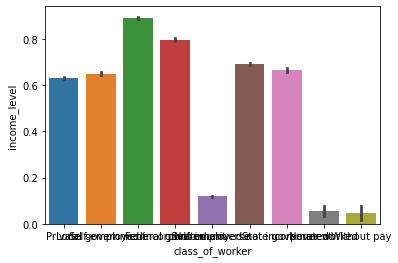

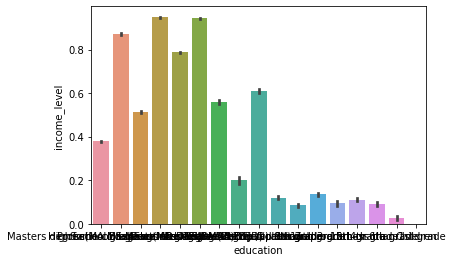

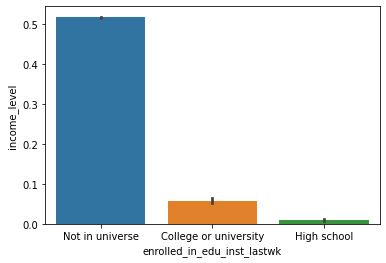

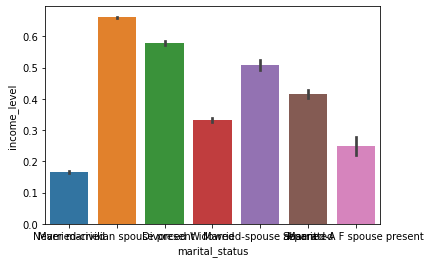

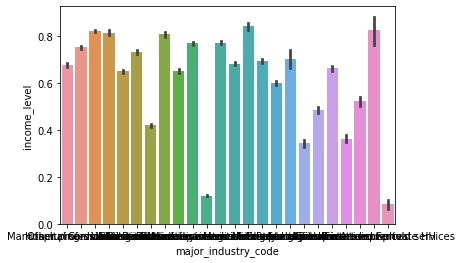

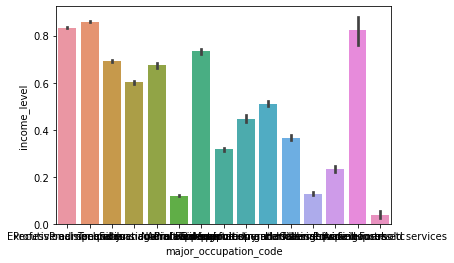

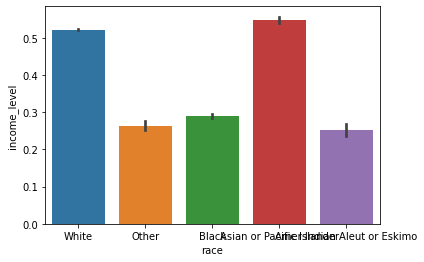

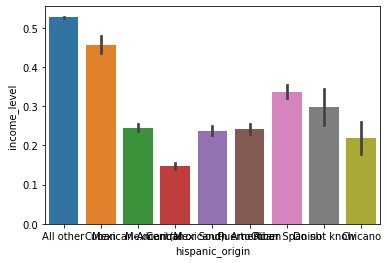

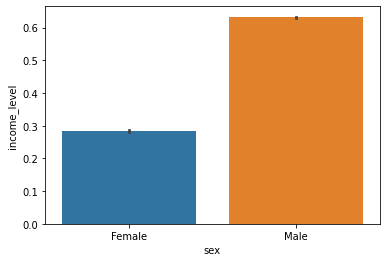

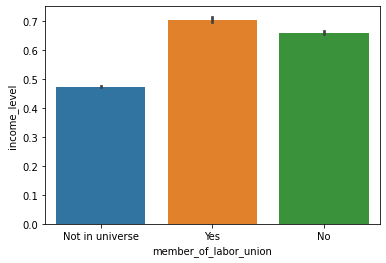

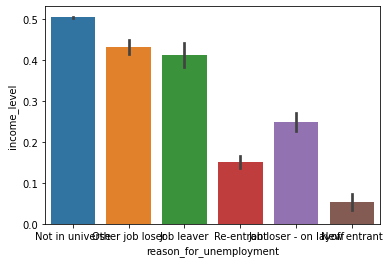

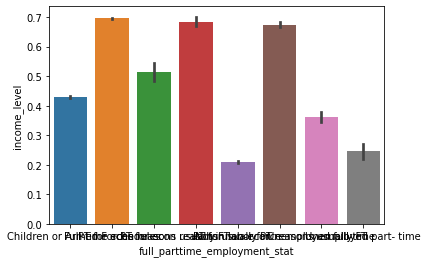

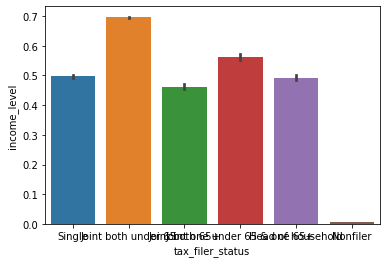

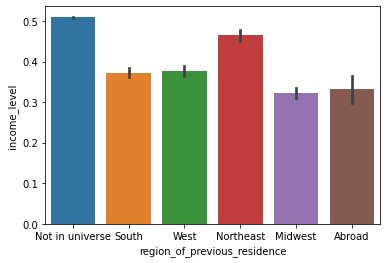

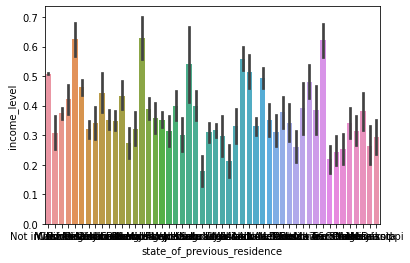

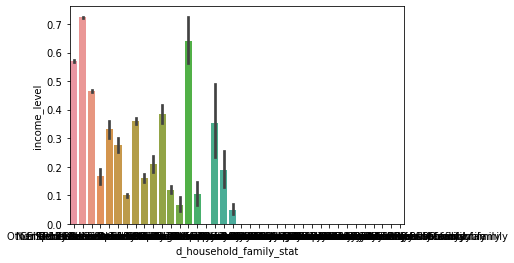

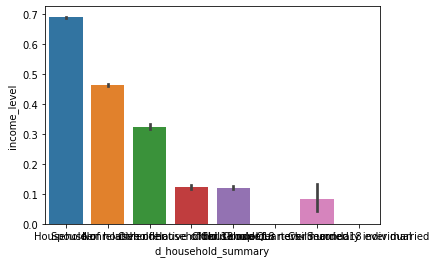

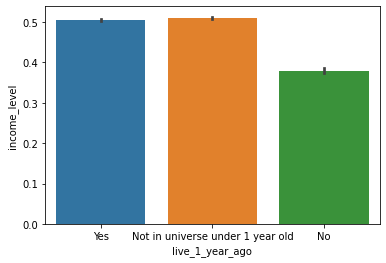

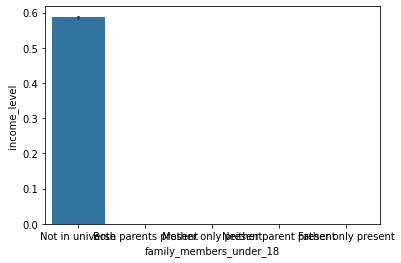

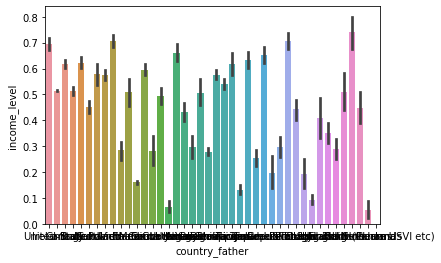

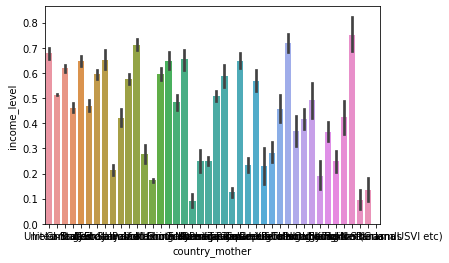

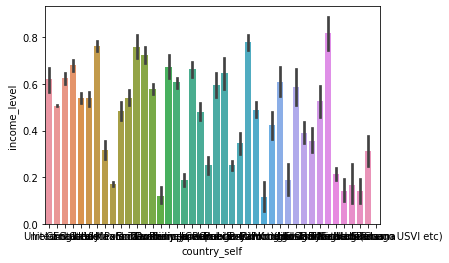

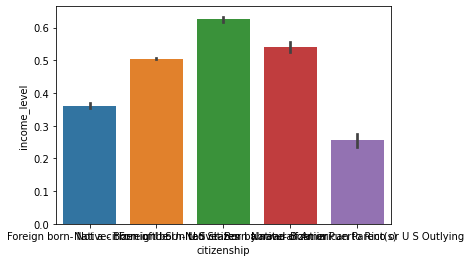

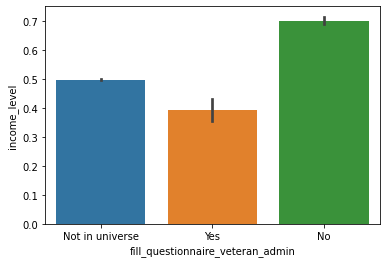

In [75]:
for col in char.columns:
    plt.figure()
    sns.barplot(x = col, y = 'income_level', data = char_Y)

In [ ]:
char.columns

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in char.columns:
    char[col] = pd.DataFrame(le.fit_transform(char[col]), columns = [col])

C:\Users\pranj\AppData\Local\Temp/ipykernel_31864/3698696735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char[col] = pd.DataFrame(le.fit_transform(char[col]), columns = [col])


In [77]:
char.head()

,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,...,state_of_previous_residence,d_household_family_stat,d_household_summary,live_1_year_ago,family_members_under_18,country_father,country_mother,country_self,citizenship,fill_questionnaire_veteran_admin
0,4,12,2,4,9,10,4,0,0,1,...,35,22,4,2,4,20,20,20,0,1
1,4,14,2,2,10,2,4,0,1,1,...,35,20,4,2,4,39,39,39,4,1
2,4,16,2,2,15,10,4,0,1,1,...,35,37,7,2,4,39,39,39,4,1
3,4,15,2,2,10,10,4,0,0,1,...,35,37,7,2,4,39,39,39,4,1
4,4,14,2,2,3,2,4,0,0,1,...,35,37,7,1,4,39,39,39,4,1


In [78]:
data = pd.concat([num,char], axis = 1)

In [79]:
data.head()

,index,age,industry_code,occupation_code,num_person_Worked_employer,weeks_worked_in_year,year,class_of_worker,education,enrolled_in_edu_inst_lastwk,...,state_of_previous_residence,d_household_family_stat,d_household_summary,live_1_year_ago,family_members_under_18,country_father,country_mother,country_self,citizenship,fill_questionnaire_veteran_admin
0,117254.0,34.0,41.0,8.0,6.0,52.0,94.0,4,12,2,...,35,22,4,2,4,20,20,20,0,1
1,14247.0,55.0,13.0,2.0,3.0,52.0,94.0,4,14,2,...,35,20,4,2,4,39,39,39,4,1
2,87358.0,55.0,45.0,12.0,1.0,48.0,94.0,4,16,2,...,35,37,7,2,4,39,39,39,4,1
3,84187.0,34.0,11.0,11.0,6.0,52.0,94.0,4,15,2,...,35,37,7,2,4,39,39,39,4,1
4,193116.0,43.0,30.0,2.0,6.0,52.0,95.0,4,14,2,...,35,37,7,1,4,39,39,39,4,1


In [80]:
data.drop(['index'], axis = 1, inplace = True)

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = pd.DataFrame(sc.fit_transform(data), columns = data.columns)

In [242]:
num.isnull().mean()

index                         0.0
age                           0.0
industry_code                 0.0
occupation_code               0.0
num_person_Worked_employer    0.0
weeks_worked_in_year          0.0
year                          0.0
dtype: float64

In [243]:
char.isnull().mean()

index                               0.0
class_of_worker                     0.0
education                           0.0
enrolled_in_edu_inst_lastwk         0.0
marital_status                      0.0
major_industry_code                 0.0
major_occupation_code               0.0
race                                0.0
hispanic_origin                     0.0
sex                                 0.0
member_of_labor_union               0.0
reason_for_unemployment             0.0
full_parttime_employment_stat       0.0
tax_filer_status                    0.0
region_of_previous_residence        0.0
state_of_previous_residence         0.0
d_household_family_stat             0.0
d_household_summary                 0.0
live_1_year_ago                     0.0
family_members_under_18             0.0
country_father                      0.0
country_mother                      0.0
country_self                        0.0
citizenship                         0.0
fill_questionnaire_veteran_admin    0.0


In [244]:
data.isnull().mean()

index                               0.0
age                                 0.0
industry_code                       0.0
occupation_code                     0.0
num_person_Worked_employer          0.0
weeks_worked_in_year                0.0
year                                0.0
index                               0.0
class_of_worker                     0.0
education                           0.0
enrolled_in_edu_inst_lastwk         0.0
marital_status                      0.0
major_industry_code                 0.0
major_occupation_code               0.0
race                                0.0
hispanic_origin                     0.0
sex                                 0.0
member_of_labor_union               0.0
reason_for_unemployment             0.0
full_parttime_employment_stat       0.0
tax_filer_status                    0.0
region_of_previous_residence        0.0
state_of_previous_residence         0.0
d_household_family_stat             0.0
d_household_summary                 0.0


In [82]:
data.head()

,age,industry_code,occupation_code,num_person_Worked_employer,weeks_worked_in_year,year,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,...,state_of_previous_residence,d_household_family_stat,d_household_summary,live_1_year_ago,family_members_under_18,country_father,country_mother,country_self,citizenship,fill_questionnaire_veteran_admin
0,-0.306128,1.057089,-0.273542,1.248450,0.738515,-1.026453,0.237222,0.323645,0.179014,1.032040,...,0.160026,0.032974,-0.133073,1.081319,0.399088,-1.986150,-1.981360,-2.685895,-3.444425,0.090742
1,0.812302,-0.483835,-0.721340,0.035757,0.738515,-1.026453,0.237222,0.851195,0.179014,-0.455042,...,0.160026,-0.171665,-0.133073,1.081319,0.399088,0.355907,0.353082,0.263485,0.333560,0.090742
2,0.812302,1.277221,0.024990,-0.772705,0.566713,-1.026453,0.237222,1.378746,0.179014,-0.455042,...,0.160026,1.567771,1.571044,1.081319,0.399088,0.355907,0.353082,0.263485,0.333560,0.090742
3,-0.306128,-0.593901,-0.049643,1.248450,0.738515,-1.026453,0.237222,1.114971,0.179014,-0.455042,...,0.160026,1.567771,1.571044,1.081319,0.399088,0.355907,0.353082,0.263485,0.333560,0.090742
4,0.173199,0.451726,-0.721340,1.248450,0.738515,0.974229,0.237222,0.851195,0.179014,-0.455042,...,0.160026,1.567771,1.571044,-0.588201,0.399088,0.355907,0.353082,0.263485,0.333560,0.090742


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.3, random_state=42)

In [86]:
X_test.head()

,age,industry_code,occupation_code,num_person_Worked_employer,weeks_worked_in_year,year,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,...,state_of_previous_residence,d_household_family_stat,d_household_summary,live_1_year_ago,family_members_under_18,country_father,country_mother,country_self,citizenship,fill_questionnaire_veteran_admin
35929,0.279716,1.057089,-0.273542,1.248450,0.738515,-1.026453,-2.783654,-0.467680,0.179014,-0.455042,...,0.160026,-0.171665,-0.133073,1.081319,0.399088,0.355907,0.353082,0.263485,0.33356,0.090742
126403,-0.519162,1.387287,-0.721340,-0.772705,0.738515,0.974229,-2.783654,1.114971,0.179014,1.032040,...,0.160026,0.032974,-0.133073,-0.588201,0.399088,0.355907,0.353082,0.263485,0.33356,0.090742
224424,-2.010401,-1.199264,-0.870606,-1.176936,-1.494917,0.974229,-0.517997,-0.203905,0.179014,1.032040,...,0.160026,-1.399503,-1.269151,-0.588201,-2.763989,0.355907,0.353082,0.263485,0.33356,0.090742
225990,-0.519162,0.396693,1.965448,-0.772705,-0.635905,-1.026453,0.237222,0.323645,0.179014,-0.455042,...,-2.559800,1.567771,1.571044,-2.257721,0.399088,0.355907,0.353082,0.263485,0.33356,0.090742
46108,-0.252869,0.726891,0.323522,-0.772705,0.738515,-1.026453,0.992442,-0.731456,0.179014,-0.455042,...,0.160026,-0.171665,-0.133073,1.081319,0.399088,0.355907,0.353082,0.263485,0.33356,0.090742


In [87]:
Y_train.head()

,level_0,index,income_level
230079,230079,230079,0
163743,163743,163743,1
106645,106645,106645,1
339603,339603,339603,0
314957,314957,314957,0


In [88]:
Y_train.drop(['level_0', 'index'], axis = 1, inplace = True)

In [89]:
Y_test.head()

,level_0,index,income_level
35929,35929,35929,1
126403,126403,126403,1
224424,224424,224424,0
225990,225990,225990,0
46108,46108,46108,1


In [90]:
Y_test.drop(['level_0', 'index'], axis = 1, inplace = True)

In [91]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred = log_reg.predict(X_test)

C:\Users\pranj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))
print(recall_score(Y_test,Y_pred))

0.8307075744756646
0.8070466734188985
0.8680572918526985


In [93]:
print(roc_auc_score(Y_test,Y_pred))

0.8308061059110715


In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)

C:\Users\pranj\AppData\Local\Temp/ipykernel_31864/2050257390.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,Y_train)


In [95]:
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))
print(recall_score(Y_test,Y_pred))

0.9805316827715189
0.9645027624309392
0.9976783226774297
